# 4: **Dealing with outliers:**

## 4.1 *What are outliers?*

Outliers are data points that significantly deviate from the majority of the data in a dataset. They can be observations that are unusually high or low compared to the other data points. Outliers can occur due to various reasons such as measurement errors, data entry errors, or genuine extreme values in the data.

> Outliers can skew and mislead the training process of machine learning models, leading to poorer predictive performance.
  

## 4.2 Other Names for Outliers
- Outliers
- Anomalies
- Deviations
- Extremes
- Aberrations
- Anomalous points
- Abberrants observations

## 4.3 Types of Outliers:
1. **Univariate Outliers**: These outliers occur when a single variable is considered for outliers. They can be classified into two types:
    - **High Outliers**: These are data points that are significantly higher than the majority of the data.
    - **Low Outliers**: These are data points that are significantly lower than the majority of the data.

2. **Bivariate outliers**: These outliers occur when two variables are considered for outliers. 
3. **Multivariate Outliers**: These outliers occur when multiple variables are considered together. They can be classified into three types:
    - **Contextual Outliers**: These outliers occur when a data point is considered an outlier in a specific context or subset of the data.
    - **Example**: A temperature of 30°C might be normal in summer but would be considered an outlier in winter.
    - **Collective Outliers**: These outliers occur when a group of data points together form an outlier, even though individually they may not be outliers.
    - **Example**: In network traffic data, a sudden spike in data transfer rate over a period might indicate a collective outlier, such as a DDoS attack.
    - **Conditional Outliers**: These outliers occur when a data point is an outlier based on certain conditions or criteria.
   
4. **Global Outlier(Point Anomalies)**:
- **Definition**: A data point that significantly deviates from the overall distribution of the entire dataset.
- **Example**: In a dataset of salaries where most are between $30,000 and $100,000, a salary of $1,000,000 is a global outlier.

5. **Point Outlier**:
- **Definition**: An individual data point that is anomalous compared to the rest of the dataset.
- **Example**: In a list of test scores where most are between 50 and 90, a score of 5 is a point outlier.

6. **Local Outlier**:
- **Definition**: A data point that deviates significantly from its local neighborhood.
- **Example**: In a dataset of city temperatures, a day with a temperature of 10°C in the middle of summer in a typically hot region (30-40°C) is a local outlier.



### 4.4 Techniques to Handle Outliers

1. **Removal**
   - **Example**: Remove data points that are beyond 3 standard deviations from the mean in a normally distributed dataset.

2. **Transformation**
   - **Log Transformation**: Convert the data to a logarithmic scale to reduce the impact of extreme values.
   - **Example**: If the dataset contains highly skewed data, applying a log transformation can reduce skewness.

3. **Imputation**
   - Replace outliers with the median or mean of the dataset.
   - **Example**: If a dataset of ages contains outliers, replacing them with the median age can be effective.

4. **Capping or Flooring**
   - Cap the extreme values to a certain percentile (e.g., 95th percentile).
   - **Example**: If a dataset of income has extreme values, cap them at the 95th percentile to reduce the effect of outliers.

5. **Using Robust Models**
   - Models like Decision Trees, Random Forests, and Gradient Boosting are less sensitive to outliers.
   - **Example**: Use a Random Forest model instead of Linear Regression for a dataset with many outliers.

6. **Clustering**
   - Use clustering algorithms like DBSCAN which can identify and ignore noise points (outliers).
   - **Example**: In a spatial dataset, DBSCAN can identify outliers that do not fit into any cluster.

7. **Isolation Forests**
   - A tree-based anomaly detection algorithm that isolates observations by randomly selecting a feature and then randomly selecting a split value.
   - **Example**: Use Isolation Forests to detect outliers in financial transaction data.

8. **Local Outlier Factor (LOF)**
   - Measures the local density deviation of a given data point with respect to its neighbors.
   - **Example**: Use LOF to identify outliers in a dataset of customer spending behavior.

`Handling outliers appropriately ensures better model performance and more reliable data analysis results.`

## 4.5 Let's see how we can identify outliers and deal with them:

In [114]:
# importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
# import the dataset:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [117]:
# Data Preprocessing:
#we already know that the columns 'age' and 'embarked' have missing values.

# check the missing values:
df.isnull().sum().sort_values(ascending=False)



deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [118]:
# drop the 'deck' column:
df.drop('deck', axis=1, inplace=True)

# let's impute the missing values:
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [119]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Now, all the missing values are imputed.

---
# 4.6 **let's deal with the oultiers:**

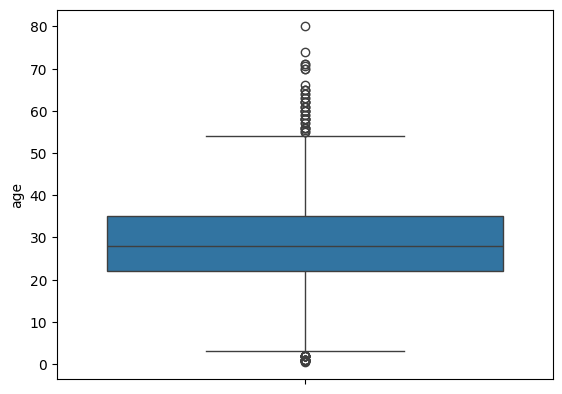

In [120]:
# check for outliers using boxplot in 'age' column:
sns.boxplot(df['age'])
plt.show()


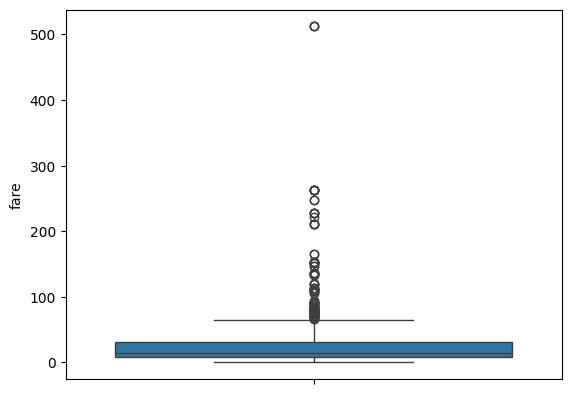

In [121]:
# plot the boxplot of 'fare' column:
sns.boxplot(df['fare'])
plt.show()

In [122]:
# remove the outliers using IQR method:

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {df['fare']}")
print("----------------------------------------")

# Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]}")
print("----------------------------------------")


----------------------------------------
Here is the data with outliers:
 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64
----------------------------------------
Here are the outliers based on the IQR threshold:
      survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female  28.0      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male  28.0      8      2   69.5500        S  Third 

In [125]:
# Remove the outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Print the data without outliers
print(f"Here is the data without outliers:\n {df['fare']}")

Here is the data without outliers:
 0       7.2500
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 775, dtype: float64


In [126]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    object  
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    int64   
 5   parch        775 non-null    int64   
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    object  
 8   class        775 non-null    category
 9   who          775 non-null    object  
 10  adult_male   775 non-null    bool    
 11  embark_town  775 non-null    object  
 12  alive        775 non-null    object  
 13  alone        775 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 75.1+ KB


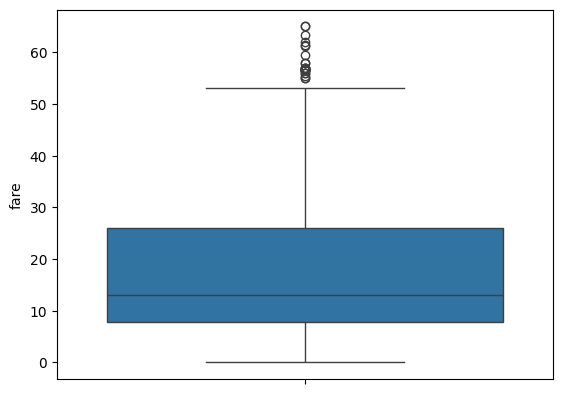

In [127]:
# check if there are any outliers in 'fare' column:
sns.boxplot(df['fare'])
plt.show()

In [128]:
# in the same way remove outliers in 'age' column using IQR method:
# remove the outliers using IQR method:

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {df['age']}")
print("----------------------------------------")

# Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]}")
print("----------------------------------------")



----------------------------------------
Here is the data with outliers:
 0      22.0
2      26.0
3      35.0
4      35.0
5      28.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 775, dtype: float64
----------------------------------------
Here are the outliers based on the IQR threshold:
      survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
6           0       1    male  54.00      0      0  51.8625        S   First   
7           0       3    male   2.00      3      1  21.0750        S   Third   
11          1       1  female  58.00      0      0  26.5500        S   First   
15          1       2  female  55.00      0      0  16.0000        S  Second   
16          0       3    male   2.00      4      1  29.1250        Q   Third   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
803         1       3    male   0.42      0      1   8.5167        C   Third   
824         0       3  

In [131]:
# Remove the outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Print the data without outliers
print(f"Here is the data without outliers:\n {df['age']}")

Here is the data without outliers:
 0      22.0
2      26.0
4      35.0
5      28.0
8      27.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 662, dtype: float64


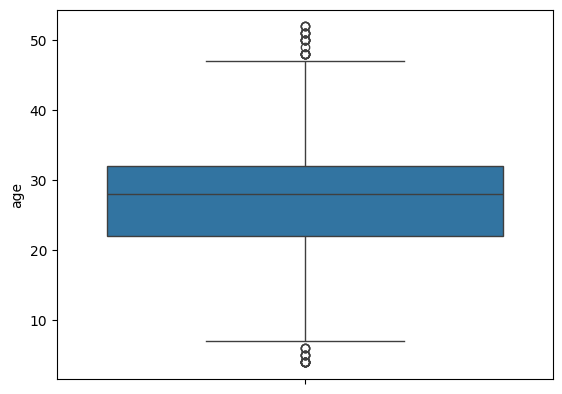

In [132]:
# boxplot to see if there are any outliers in 'age' column:
sns.boxplot(df['age'])
plt.show()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     662 non-null    int64   
 1   pclass       662 non-null    int64   
 2   sex          662 non-null    object  
 3   age          662 non-null    float64 
 4   sibsp        662 non-null    int64   
 5   parch        662 non-null    int64   
 6   fare         662 non-null    float64 
 7   embarked     662 non-null    object  
 8   class        662 non-null    category
 9   who          662 non-null    object  
 10  adult_male   662 non-null    bool    
 11  embark_town  662 non-null    object  
 12  alive        662 non-null    object  
 13  alone        662 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 64.1+ KB


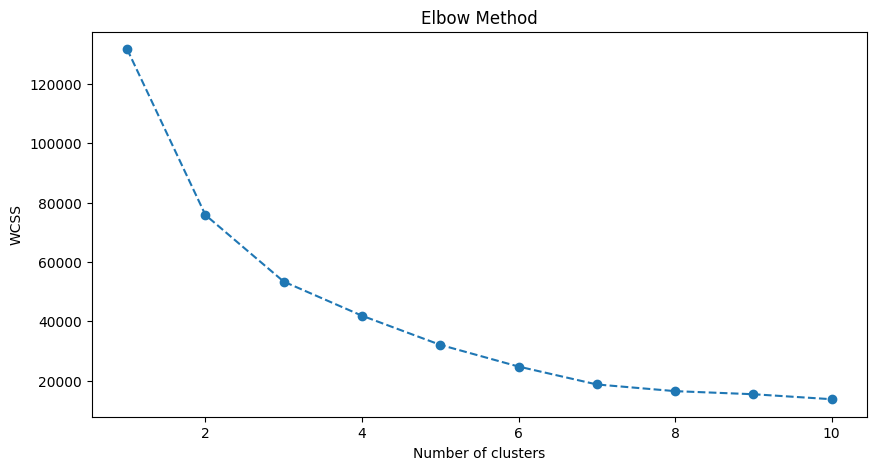

In [134]:
# Import library
from sklearn.cluster import KMeans

# Select the features
X = df[['age', 'fare']]
X.head()

# Elbow Method to find the optimal number of clusters:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [135]:
# Train the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# fit the model
kmeans.fit(X)

# Predict the clusters
df['Cluster'] = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(df['age'], df['fare'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of passengers') 

KMeans(n_clusters=3, random_state=42)

In [137]:
# another example:

# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]


---
### So, these are some techniques that we can use to detect and remove outliers in our dataset:


---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389